Name: Han Chen, Daniel Fernandez Davila

### Models
I. Baseline Model
1. First tried to classify with Lexicon list of Positive and Negative Words from previous Sentiment Analysis Models. 
2. Count the occurrences of Positive and Negative Words and classify the tweet accordingly (Net sum positive as +1, otherwise -1)   
3. The accuracy of this baseline model is 46.54%, lower than a random guess. 
So we decided to use the random guess as our baseline model, simple and easy.   

II. Other models
1. We tried three ways to construct our features:  
   (1) Bag of Words using CountVectorizer  
       Bag of Words simply count the number of occurance of each word in the text corpus.Each word becomes a feature, and the number of occurance is the value.  
   (2) TFIDF   
       TFIDF also weight each word in the document based on the appearance in the document. This not only reflects the importance of words in the text, but also normalizes each vector.  
   (3) Word Embeddings  
       Word Embeddings yield the best test accuracy of the models, so we decided to use that for feature selection. We thought the reason might be that word embeddings are capable to capturing the semantic meaning of the words. In our project, each text is converted into a 200 length vector. (In the word embedding approach notebook) 
2. PCA was applied before running models. Best n_components was chosen by the maximum variance explained of the data.
3. We then implemented the models by first chose hyperparameters by grid search/cross validation, and then trained and tested with 75%/25% training and test split.   
    Majority voting was introduced to combine all learner together and predict the test data to be the majority vote of each learner. 

In this script we use the approach of word embeddings

## Load the Data

In [1]:
import pandas as pd
data = pd.read_csv('data_to_ml_models.csv',encoding='utf-8')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,open,close,change (%),movement,text,count
0,1345.366757,1342.639048,-0.202748,-1,"#Banks vs #cryptocurrency war: Bitfinex, OKcoi...",3
1,1341.000005,1352.193569,0.834718,1,Bitcoin Origins RT @CHalexov2016: Time to buy ...,11
2,1352.193569,1336.419090,-1.166584,-1,The end of cash: It xe2 x80 x99s a Bit harder ...,4
3,1336.020000,1347.399011,0.851710,1,#BitcoinUnlimited is production ready guys. RT...,13
4,1346.862890,1364.896000,1.338897,1,RT @btc_manager: Character Assassins for Hire:...,5


# Reading Embeddings

In [143]:
data = pd.read_csv('base_embeddings_6.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

,Unnamed: 0.1,open,close,change (%),movement,text,count,0,1,2,...,190,191,192,193,194,195,196,197,198,199
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1,"['banks', 'vs', 'cryptocurrency', 'war', 'bitf...",1,-0.012624,0.221876,-0.038813,...,0.206866,-0.248529,0.038347,-0.047112,0.039724,-0.030455,0.148470,0.077294,0.030096,0.083379
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1,"['the', 'scaling', 'debate', 'reminds', 'feedi...",2,0.058964,-0.025817,0.182265,...,-0.086966,-0.197172,0.062457,0.022088,0.109503,-0.124608,0.182209,0.133733,-0.014163,0.106185
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1,"['origins', 'rt', 'time', 'buy', 'cheap', 'crb...",6,-0.031529,0.211298,-0.116589,...,0.050164,0.033500,0.113346,-0.108261,0.045596,0.081966,0.067613,0.163596,0.011211,0.054668
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1,"['le', 'crypto', 'sigh', 'short', 'btc', 'vs',...",5,0.071112,0.110933,-0.048036,...,0.121811,-0.048703,0.069157,-0.076344,0.097576,0.006364,0.037520,0.183348,0.005154,0.054413
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1,"['the', 'end', 'cash', 'it', 'bit', 'harder', ...",1,-0.047409,0.187053,0.027211,...,0.101252,-0.136425,0.150778,-0.203710,0.307542,-0.118546,-0.082693,0.377706,-0.112183,-0.139353


In [145]:
data.movement.value_counts()

 1    758
-1    626
 0      1
Name: movement, dtype: int64

## Adding the previous movement as a present attribute
We added 10 attributes (the past 60 hours) to record the lag movement of the market. 

In [180]:
data['prev'] = data.movement.shift()
data['prev1'] = data.movement.shift(2)
data['prev2'] = data.movement.shift(3)
data['prev3'] = data.movement.shift(4)
data['prev4'] = data.movement.shift(5)
data['prev5'] = data.movement.shift(6)
data['prev6'] = data.movement.shift(7)
data['prev7'] = data.movement.shift(8)
data['prev8'] = data.movement.shift(9)
data['prev9'] = data.movement.shift(10)

In [181]:
data.head()

,Unnamed: 0.1,open,close,change (%),movement,text,count,0,1,2,...,prev,prev1,prev2,prev3,prev4,prev5,prev6,prev7,prev8,prev9
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1,"['banks', 'vs', 'cryptocurrency', 'war', 'bitf...",1,-0.012624,0.221876,-0.038813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1,"['the', 'scaling', 'debate', 'reminds', 'feedi...",2,0.058964,-0.025817,0.182265,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1,"['origins', 'rt', 'time', 'buy', 'cheap', 'crb...",6,-0.031529,0.211298,-0.116589,...,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1,"['le', 'crypto', 'sigh', 'short', 'btc', 'vs',...",5,0.071112,0.110933,-0.048036,...,1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1,"['the', 'end', 'cash', 'it', 'bit', 'harder', ...",1,-0.047409,0.187053,0.027211,...,1.0,1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


## Balancing the data

In [182]:
#Balancinga data
data_up = data[data['movement'] == 1]
data_down = data[data['movement'] == -1]
data_balanced = data_down.sample(n= 626).append(data_up.sample(n=626))
data_balanced.loc[:,'movement'].describe()

count    1252.0000
mean        0.0000
std         1.0004
min        -1.0000
25%        -1.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: movement, dtype: float64

## Normalize

### In case case of word2vec, normalizalize

In [184]:
data_balanced = data_balanced.dropna()

In [185]:
from sklearn.preprocessing import normalize
base2 = pd.DataFrame(normalize(data_balanced.iloc[:,6:], axis = 1))

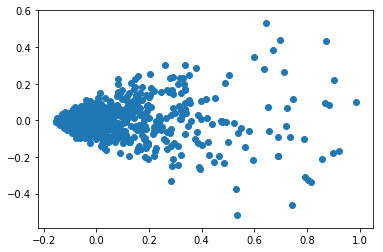

In [187]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
X_r = pca.fit(base2).transform(base2)
#X_r = pca.fit(data.iloc[:,7:]).transform(data.iloc[:,7:])

# plot
plt.scatter(X_r[:, 0], X_r[:, 1])
#plt.xlim(-20,20)

# display variance explained
#print('Explained variance ratio for the principal component axes:', pca.explained_variance_ratio_)

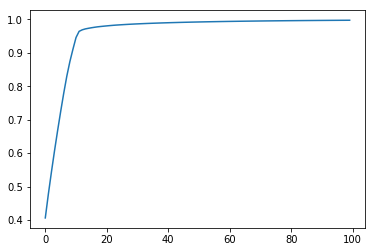

In [188]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [189]:
pca = PCA(n_components=16)
# For word2vec
#X_r_final = pca.fit(data.iloc[:,7:]).transform(data.iloc[:,7:])
X_r_final = pca.fit(base2).transform(base2)
base_model = pd.DataFrame(X_r_final)

base_model.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.060789,0.086180,-0.049658,0.049041,0.039798,0.028154,-0.063442,0.087339,0.137370,-0.032673,0.003442,-0.062373,-0.004296,0.012954,-0.001948,0.011634
1,0.237849,-0.011767,-0.011277,-0.012278,0.097384,-0.278492,0.013838,-0.066179,-0.110490,0.043489,-0.073825,-0.096944,0.008731,-0.004458,0.016457,0.009655
2,0.311957,0.201232,0.010558,0.091132,-0.098739,-0.015325,-0.188149,0.153060,-0.067750,-0.068355,0.184674,0.002140,0.002370,-0.045934,-0.006880,0.011744
3,-0.104360,0.020876,0.048985,-0.026895,0.007523,-0.013937,-0.013746,0.017431,-0.003492,-0.017973,-0.025499,0.008952,0.000532,0.002602,0.002067,-0.004379
4,0.222028,-0.057210,-0.042307,-0.035032,0.205191,-0.014171,-0.022780,0.024703,-0.070817,0.015216,0.220324,-0.064531,0.013181,-0.010245,-0.011015,0.002417


# Models

# Decision Tree

In [154]:
# In case of word2vec
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
base_model, data_balanced['movement'], test_size = 0.30, random_state = 1)

# Decision Tree

In [155]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

clf = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), param_grid=[{'max_depth':np.arange(1,20,1)}], scoring='accuracy', cv=10)
clf.fit(X_train, y_train)
print('{}{}{}{}'.format('C: ',clf.best_estimator_, '  Best Score: ', clf.best_score_))


C: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')  Best Score: 0.5057471264367817


In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building an unpruned decision tree
dt_trained = DecisionTreeClassifier(criterion="entropy", random_state=91, max_depth=11)
dt_trained.fit(X_train,y_train)
ypred_train = dt_trained.predict(X_train)
ypred_test_dt = dt_trained.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test_dt)))

Training Accuracy:  0.7919540229885057
Test Accuracy:  0.5240641711229946


In [207]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)


array([[104,  86],
       [ 92,  92]])

In [208]:
dt_trained.tree_.max_depth

11

In [209]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

pred_probability_dt = dt_trained.predict_proba(X_test)
pred_proba_dt = pd.DataFrame(pred_probability_dt).iloc[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
'{}{}'.format('ROC AUC: ', roc_auc_dt)

'ROC AUC: 0.5279605263157895'

# Random Forest

In [104]:
# Cross Validation to set Hyper Params
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

start_time = time.time()
clf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=50, criterion='entropy'), param_grid=[{'max_depth':np.arange(2,40,1)}], scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print('{}{}{}{}'.format('C: ',clf.best_estimator_, '  Best Score: ', clf.best_score_))

time.time() - start_time

C: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=33, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)  Best Score: 0.5251141552511416


55.38734316825867

In [210]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000, criterion='entropy')
rf_trained = rf.fit(X_train, y_train)

y_pred_train_rf = rf_trained.predict(X_train)
y_pred_test_rf = rf_trained.predict(X_test)

print('{}{}'.format('Training Accuracy: ', accuracy_score(y_train,y_pred_train_rf)))
print('{}{}'.format('Test Accuracy: ', accuracy_score(y_test,y_pred_test_rf)))
print(confusion_matrix(y_test,y_pred_test_rf))

Training Accuracy: 1.0
Test Accuracy: 0.4893048128342246
[[106  84]
 [107  77]]


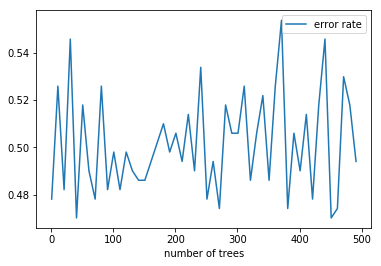

In [38]:
# Checking the optimal number of trees
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()

accuracies = []
for i in np.arange(1,500,10):
    rf = RandomForestClassifier(n_estimators=i)#, criterion='entropy', max_depth = 10)
    rf_trained = rf.fit(X_train, y_train)
    y_pred_test_rf = rf_trained.predict(X_test)
    accuracies.append((i, accuracy_score(y_test,y_pred_test_rf)))

time.time() - start_time

acc = pd.DataFrame(accuracies)
acc.columns = ['number of trees','error rate']
acc['error rate'] = 1 - acc['error rate'] 
acc.plot(x = 'number of trees', y = 'error rate')

In [211]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

pred_probability_rf = rf_trained.predict_proba(X_test)
pred_proba_pd_rf = pd.DataFrame(pred_probability_rf).iloc[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pred_proba_pd_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

'{}{}'.format('ROC AUC: ', roc_auc_rf)

'ROC AUC: 0.48037757437070944'

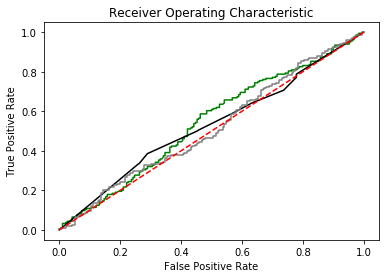

In [216]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_rf, tpr_rf, "#155084")
plt.plot(fpr_nb, tpr_nb, 'g')
plt.plot(fpr_dt, tpr_dt, 'black')
plt.plot(fpr_lr, tpr_lr, 'gray')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.1])
#plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [62]:
# Cross Validation to set Hyper Params
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

start_time = time.time()
clf = GridSearchCV(estimator=LogisticRegression(), param_grid=[{'C':np.arange(0.1,3,.1)}], scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print('{}{}{}{}'.format('C: ',clf.best_estimator_, '  Best Score: ', clf.best_score_))

time.time() - start_time

C: LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  Best Score: 0.5198412698412699


0.5254120826721191

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression('l1', C = 1)
LR_trained = LR.fit(X_train, y_train)
LR_y_pred_lr = LR_trained.predict(X_test)
LR_y_pred_train = LR_trained.predict(X_train)

print('{}{}'.format('Training Accuracy: ', accuracy_score(y_train,LR_y_pred_train)))
print('{}{}'.format('Test Accuracy: ', accuracy_score(y_test,LR_y_pred_lr)))
confusion_matrix(y_test, LR_y_pred)

Training Accuracy: 0.5149425287356322
Test Accuracy: 0.5187165775401069


array([[ 63, 127],
       [ 53, 131]])

In [206]:
from sklearn.metrics import roc_curve, auc

pred_probability_lr = LR_trained.predict_proba(X_test)
pred_proba_pd_lr = pd.DataFrame(pred_probability_lr).iloc[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_proba_pd_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
'{}{}'.format('ROC AUC: ', roc_auc_lr)

'ROC AUC: 0.5157322654462242'

# Naive Bayes

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb_trained = nb.fit(X_train, y_train)
y_predict_train_nb = nb_trained.predict(X_train)
y_predict_test_nb = nb_trained.predict(X_test)

print("Training Accuracy: ",str(accuracy_score(y_train,y_predict_train_nb)))
print("Test Accuracy: ",str(accuracy_score(y_test,y_predict_test_nb)))

confusion_matrix(y_test, ypred_test)

Training Accuracy:  0.5540229885057472
Test Accuracy:  0.5427807486631016


array([[104,  86],
       [ 92,  92]])

In [168]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

pred_probability_nb = nb_trained.predict_proba(X_test)
pred_proba_nb = pd.DataFrame(pred_probability_nb).iloc[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
'{}{}'.format('ROC AUC: ', roc_auc_nb)

'ROC AUC: 0.541533180778032'

# SVM

In [219]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

clf = GridSearchCV(estimator=SVC(), param_grid=[{'C':np.arange(1,10000,10)}], scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print('{}{}{}{}'.format('C: ',clf.best_estimator_, '  Best Score: ', clf.best_score_))

In [230]:
from sklearn.svm import SVC
svm = SVC(C=10000, probability=True)
svm_trained = svm.fit(X_train, y_train)

y_pred_train_svm = svm_trained.predict(X_train)
y_pred_test_svm = svm_trained.predict(X_test)

print('{}{}'.format('Training Accuracy: ', accuracy_score(y_train,y_pred_train_svm)))
print('{}{}'.format('Test Accuracy: ', accuracy_score(y_test,y_pred_test_svm)))
confusion_matrix(y_test,y_pred_test_svm)

Training Accuracy: 0.5873563218390805
Test Accuracy: 0.5802139037433155


array([[116,  74],
       [ 83, 101]])

In [233]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

pred_probability_svm = svm_trained.predict_proba(X_test)
pred_proba_svm = pd.DataFrame(pred_probability_svm).iloc[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
'{}{}'.format('ROC AUC: ', roc_auc_svm)

'ROC AUC: 0.49528032036613273'

In [259]:
svm_prob = pd.DataFrame(pred_probability_svm).iloc[:,0]
print(svm_prob[svm_prob == svm_prob.max()])
svm_prob[svm_prob == svm_prob.min()]

128    0.542929
Name: 0, dtype: float64


219    0.469707
Name: 0, dtype: float64

## KNN

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=[{'n_neighbors':np.arange(1,50,1)}], scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print('{}{}{}{}'.format('C: ',clf.best_estimator_, '  Best Score: ', clf.best_score_))

C: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')  Best Score: 0.5195402298850574


In [203]:
from sklearn.neighbors import KNeighborsClassifier
k_N = KNeighborsClassifier(n_neighbors=9) 
k_N.fit(X_train, y_train)
KNN_y_pred_train = k_N.predict(X_train)
KNN_y_pred = k_N.predict(X_test)

print('{}{}'.format('Training Accuracy: ', accuracy_score(y_train,KNN_y_pred_train)))
print('{}{}'.format('Test Accuracy: ', accuracy_score(y_test,KNN_y_pred)))

Training Accuracy: 0.6402298850574712
Test Accuracy: 0.5401069518716578


In [221]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

pred_probability_knn = k_N.predict_proba(X_test)
pred_proba_knn = pd.DataFrame(pred_probability_knn).iloc[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
'{}{}'.format('ROC AUC: ', roc_auc_knn)

'ROC AUC: 0.5297482837528603'

# AdaBoost

In [130]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                                  random_state=1,
                               max_depth=30)
ada = AdaBoostClassifier(base_estimator=tree,
                          n_estimators=1000, 
                          learning_rate=0.1,
                          random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.513


# ROC

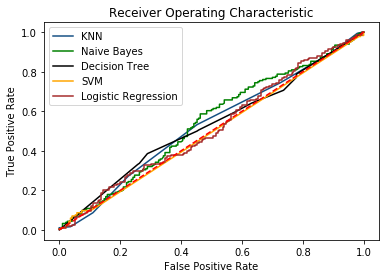

In [247]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_rf, tpr_rf, "#155084", label = 'Random Forest')
plt.plot(fpr_knn, tpr_knn, '#155084',label = 'KNN')
plt.plot(fpr_nb, tpr_nb, 'g', label = 'Naive Bayes')
plt.plot(fpr_dt, tpr_dt, 'black', label = 'Decision Tree')
plt.plot(fpr_svm, tpr_svm, 'orange', label = 'SVM')
plt.plot(fpr_lr, tpr_lr, 'brown', label = 'Logistic Regression')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.1])
#plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## Mayority Voting

In [240]:
from collections import Counter
pred = pd.DataFrame({'Decision Tree': ypred_test_dt,
                    'Logistic Regression': LR_y_pred_lr,
                    'Naive Bayes': y_predict_test_nb,
                    'SVM': y_pred_test_svm,
                    'KNN': KNN_y_pred,
                    })
y_pred_stacking = []
for i in range(len(pred)):
    y_pred_stacking.append(Counter(pred.iloc[i]).most_common()[0][0])
pred['Stacking Prediction'] = y_pred_stacking
print('Test accuracy:', accuracy_score(y_test, y_pred_stacking))

Test accuracy: 0.5721925133689839


In [241]:
pred.head(10)

,Decision Tree,KNN,Logistic Regression,Naive Bayes,SVM,Stacking Prediction
0,1,-1,1,-1,-1,-1
1,-1,1,1,-1,1,1
2,1,1,1,-1,1,1
3,1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,-1
6,-1,1,-1,-1,-1,-1
7,-1,-1,1,-1,1,-1
8,1,1,1,-1,1,1
9,1,-1,1,1,-1,1


# Findings and Takeaways

Our analysis suggests that, given the data we have and the period we analyzed, Bitcoin increases can be poorly predicted with Twitter activity. From the different models that we tried, (Logistic Regression, KNN, Random Forest, SVM, AdaBoost, Naive Bayes) the model that has the best performance is Support Vector Machines, with an accuracy of 0.58, which is better than our baseline model (0.5). (The majority voting method have a similar accuracy score than SVM).

Additionally, we found that the causation effect is not clearly defined. When Bitcoin prices change, this movement can trigger tweets, and vice-versa, one "hot new" can change the market. Hence, it is tough to disentangle the causation effect; appropriate econometric approaches can be done to analyze this causation effect.

The low performance metrics we got can be due to following factors:

1) Tweets style not standardized - special characters/abbreviation so that there are no exhaustive filtering methods available. Particularly on social media, people use different spellings, abbreviations, even emojis. The way that people tweet is so flexible that makes it hard to standardize the wording. 

2) Our data has limited and specific type of users (its possible to scrape Twitter regularly to increase variance in users).

3) Our model does not account for tweet impressions (nor Followers) Tweets that have more retweets or comments may have larger influence on the market. 

4) People tweet about Bitcoin differently. When the market is dull, some people tend to tweet optimistically and to motivate the public, others might tweet about the downwarding of the market subjectively. These significant different styles of writing introduce the noice to our models thus could not produce a more accurate prediction. For instance, the data we collected is from some specific users, particularly Twitter Bitcoin influencers, who generally are related to the Bitcoin business. So, they tend to motivate their followers to avoid selling Bitcoins. Hence, the tweets corpus could be mixed with "bad" news and "good" motivational comments. This combination could make more difficult to classify the market movement based on tweets, especially using word embeddings.
 
For future work, the number of Twitter users can be extendend. Also, the number of followers can be taken into account for the analysis. Tweeter accounts that have more followers may have large impact on the public's take on the market. If taking this into account, models can reflect the reaction to users who have different level of impact.  

Furthermore, other more robust methods can be used, like deep neural networks.